# Proyecto Final
## Jason Rodriguez
## Percy Herrera

El set de datos es sobre informacion de campana de recoleccion de dineros de cuentas en mora, es la informacion sobre clientes contactados, con una oferta concreta para cerrar su cuenta en mora por un monto inferior al actual.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('proyectoF1T.csv')
df2 = pd.read_csv('proyectoF2F.csv')
print(df1.shape)
df1.head()

(2595, 31)


,id,approval_amount,recommendation,redeem_ts,contacted,email_contacted_ts,sms_contacted_ts,birth_dt,state,city,...,account_payment_method,collections_category,days_past_due,number_of_payments,amount_financed,data_correction,merchant_id,source,initial_decision,last_payment_amount
0,503603788,250.0,APPROVE,2019-01-24 09:50:41.115000,False,NaN,2019-01-24 09:36:27.784000,1988-05-21,CO,Aurora,...,MANUAL,NaN,0,52,NaN,False,14206566,MERCHANT,APPROVED,70.34
1,399999590,80.0,APPROVE,2019-01-24 17:34:47.768000,False,2019-01-24 12:16:54.626000,NaN,1998-01-13,TX,Weatherford,...,MANUAL,NaN,0,26,0.0,False,107313386,INTERNET,APPROVED,NaN
2,330633304,956.0,APPROVE,2019-01-24 18:18:53.120000,False,2019-01-24 13:17:29.359000,2019-01-24 13:15:59.087000,1975-12-09,WA,Othello,...,MANUAL,NaN,0,12,0.0,False,230266536,MERCHANT,APPROVED,NaN
3,422247835,9.0,APPROVE,2019-01-24 18:36:06.694000,False,NaN,2019-01-24 13:19:17.988000,1985-09-09,CA,Imperial,...,MANUAL,NaN,0,26,0.0,False,332752404,MERCHANT,APPROVED,NaN
4,427183074,250.0,APPROVE,2019-01-25 08:47:49.726000,False,2019-01-24 09:08:46.690000,2019-01-24 09:08:20.447000,1980-11-23,OH,Cleveland,...,MANUAL,NaN,0,26,0.0,False,358414568,MERCHANT,APPROVED,NaN


# Preprocesado de la data

Ahora necesitamos procesar los dos dataframes para unirlos y eliminar algunas columnas para lograr una primera version del set de datos lo suficientemente simple para empezar nuestros analysis e ir agregando columnda y datos conforme necesitemos.

In [24]:
In [13]: df1 = df1.append(df2)
df2 = None    
print(df1.shape)

(6095, 31)


In [25]:
dfp = df1.filter(['approval_amount','contacted','email_contacted_ts','sms_contacted_ts'
                  ,'birth_dt','rent_or_own','months_at_current_residence','years_at_current_residence'
                  ,'direct_deposit','black_listed','language_preference','military_applicant'
                  ,'scheduled_payment_amt','number_of_payments','initial_decision','last_payment_amount'], axis=1)
print(dfp.shape)
dfp.head()

(6095, 16)


,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,birth_dt,rent_or_own,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,initial_decision,last_payment_amount
0,250.0,False,NaN,2019-01-24 09:36:27.784000,1988-05-21,RENT,1,2,True,False,EN,False,18.84,52,APPROVED,70.34
1,80.0,False,2019-01-24 12:16:54.626000,NaN,1998-01-13,RENT,0,1,True,False,EN,False,32.88,26,APPROVED,NaN
2,956.0,False,2019-01-24 13:17:29.359000,2019-01-24 13:15:59.087000,1975-12-09,RENT,0,1,False,False,ES,False,423.50,12,APPROVED,NaN
3,9.0,False,NaN,2019-01-24 13:19:17.988000,1985-09-09,RENT,11,0,False,False,EN,False,18.15,26,APPROVED,NaN
4,250.0,False,2019-01-24 09:08:46.690000,2019-01-24 09:08:20.447000,1980-11-23,RENT,0,6,True,False,EN,False,87.73,26,APPROVED,NaN


In [26]:
dfp_target = df1.filter(['redeem_ts'], axis=1)
print(dfp_target.shape)
dfp_target.head()

(6095, 1)


,redeem_ts
0,2019-01-24 09:50:41.115000
1,2019-01-24 17:34:47.768000
2,2019-01-24 18:18:53.120000
3,2019-01-24 18:36:06.694000
4,2019-01-25 08:47:49.726000


## Analisis de porcentaje de nulos
 
En este paso analizamos el porcentaje de las columnas para validar si hay columnas que no nos aporten datos validos para el caso

In [27]:
dfp.isna().mean().round(4) * 100

approval_amount                 0.00
contacted                       0.00
email_contacted_ts              7.86
sms_contacted_ts               39.93
birth_dt                        0.00
rent_or_own                     0.00
months_at_current_residence     0.00
years_at_current_residence      0.00
direct_deposit                  0.28
black_listed                    0.00
language_preference             0.00
military_applicant              0.00
scheduled_payment_amt           0.00
number_of_payments              0.00
initial_decision                0.00
last_payment_amount            50.06
dtype: float64

Ahora hacemos el mismo analisis para el data frame con la data de target

In [28]:
dfp_target.isna().mean().round(4) * 100

redeem_ts    57.42
dtype: float64

### last_payment_amount

Es la candidata a eliminar por tener un porcentaje muy alto de valores nulos (50.06%) por lo cual no nos aportaria informacion importante para nuestro modelo.

### sms_contacted_ts

Esta columna no aplica dado que los nulos equivalen a personas que no fueron contactadas por SMS, esta informacion si es importante para nuestro analisis, en un paso posterior remplazaremos estos valores por valores booleanos para identificar las personas contactadas por este medio.

### Dataframe de target redeem_ts

Un caso muy similar a las otra columnas donde los valores nulos serian personas que no canjearon su oferta, y las instancias con valores de fecha serian las personas que si cancelaron aprovechando la oferta.

In [29]:
print(dfp.shape)
dfp = dfp.drop('last_payment_amount', 1)
print(dfp.shape)

dfp.head()


(6095, 16)
(6095, 15)


,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,birth_dt,rent_or_own,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,initial_decision
0,250.0,False,NaN,2019-01-24 09:36:27.784000,1988-05-21,RENT,1,2,True,False,EN,False,18.84,52,APPROVED
1,80.0,False,2019-01-24 12:16:54.626000,NaN,1998-01-13,RENT,0,1,True,False,EN,False,32.88,26,APPROVED
2,956.0,False,2019-01-24 13:17:29.359000,2019-01-24 13:15:59.087000,1975-12-09,RENT,0,1,False,False,ES,False,423.50,12,APPROVED
3,9.0,False,NaN,2019-01-24 13:19:17.988000,1985-09-09,RENT,11,0,False,False,EN,False,18.15,26,APPROVED
4,250.0,False,2019-01-24 09:08:46.690000,2019-01-24 09:08:20.447000,1980-11-23,RENT,0,6,True,False,EN,False,87.73,26,APPROVED


## Conversion de los campos fecha a boolean

Tomando en cuenta el conocimiento del negocio estas dos columnas "email_contacted_ts" y "sms_contacted_ts" son tipo timestamp pero indican el momento que la persona fue contactado, para efectos de nuestro analysis vamos a convertir las columnas con dato en valor "True" y las nulas en "False".

In [30]:
dfp.loc[~dfp.email_contacted_ts.isnull(),"email_contacted_ts"]=True 
dfp.loc[~dfp.sms_contacted_ts.isnull(),"sms_contacted_ts"]=True 

dfp.head()

,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,birth_dt,rent_or_own,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,initial_decision
0,250.0,False,NaN,True,1988-05-21,RENT,1,2,True,False,EN,False,18.84,52,APPROVED
1,80.0,False,True,NaN,1998-01-13,RENT,0,1,True,False,EN,False,32.88,26,APPROVED
2,956.0,False,True,True,1975-12-09,RENT,0,1,False,False,ES,False,423.50,12,APPROVED
3,9.0,False,NaN,True,1985-09-09,RENT,11,0,False,False,EN,False,18.15,26,APPROVED
4,250.0,False,True,True,1980-11-23,RENT,0,6,True,False,EN,False,87.73,26,APPROVED


In [31]:
dfp["email_contacted_ts"].fillna(False, inplace = True) 
dfp["sms_contacted_ts"].fillna(False, inplace = True) 
dfp.head()

,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,birth_dt,rent_or_own,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,initial_decision
0,250.0,False,False,True,1988-05-21,RENT,1,2,True,False,EN,False,18.84,52,APPROVED
1,80.0,False,True,False,1998-01-13,RENT,0,1,True,False,EN,False,32.88,26,APPROVED
2,956.0,False,True,True,1975-12-09,RENT,0,1,False,False,ES,False,423.50,12,APPROVED
3,9.0,False,False,True,1985-09-09,RENT,11,0,False,False,EN,False,18.15,26,APPROVED
4,250.0,False,True,True,1980-11-23,RENT,0,6,True,False,EN,False,87.73,26,APPROVED


Procesamiento similar para los datos target que indican las personas que cancelaron usando la oferta

In [32]:
dfp_target.loc[~dfp_target.redeem_ts.isnull(),"redeem_ts"]=True 
dfp_target["redeem_ts"].fillna(False, inplace = True) 
dfp_target.head()

,redeem_ts
0,True
1,True
2,True
3,True
4,True


Volvemos a validad el porcentaje de nulos para el dataframe de target

In [33]:
dfp_target.isna().mean().round(4) * 100

redeem_ts    0.0
dtype: float64

Como podemos comprobar nuestro dataframe de target esta listo y libre de valores nulos.



Remplazo de los valores nulos para la columna "direct_deposit"

In [34]:
dfp["direct_deposit"].fillna(False, inplace = True) 

Volvemos a verificar el porcentaje de nulos solo para confirmar que lo anterior funciono correctamente y no tengamos mas valores nulos en ninguna de nuestras columnas

In [35]:
dfp.isna().mean().round(4) * 100

approval_amount                0.0
contacted                      0.0
email_contacted_ts             0.0
sms_contacted_ts               0.0
birth_dt                       0.0
rent_or_own                    0.0
months_at_current_residence    0.0
years_at_current_residence     0.0
direct_deposit                 0.0
black_listed                   0.0
language_preference            0.0
military_applicant             0.0
scheduled_payment_amt          0.0
number_of_payments             0.0
initial_decision               0.0
dtype: float64

## Remplazo de la columna date of birth por Edad

Hacemos calculo de la edad con base en el dato de la columna date of birth

In [36]:
now = pd.Timestamp('now')
dfp['birth_dt'] = pd.to_datetime(dfp['birth_dt'])   
dfp['age'] = (now - dfp['birth_dt']).astype('<m8[Y]')    

dfp.head()

,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,birth_dt,rent_or_own,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,initial_decision,age
0,250.0,False,False,True,1988-05-21,RENT,1,2,True,False,EN,False,18.84,52,APPROVED,31.0
1,80.0,False,True,False,1998-01-13,RENT,0,1,True,False,EN,False,32.88,26,APPROVED,21.0
2,956.0,False,True,True,1975-12-09,RENT,0,1,False,False,ES,False,423.50,12,APPROVED,43.0
3,9.0,False,False,True,1985-09-09,RENT,11,0,False,False,EN,False,18.15,26,APPROVED,33.0
4,250.0,False,True,True,1980-11-23,RENT,0,6,True,False,EN,False,87.73,26,APPROVED,38.0


In [37]:
dfp = dfp.drop('birth_dt', 1)
dfp.head()


,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,rent_or_own,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,initial_decision,age
0,250.0,False,False,True,RENT,1,2,True,False,EN,False,18.84,52,APPROVED,31.0
1,80.0,False,True,False,RENT,0,1,True,False,EN,False,32.88,26,APPROVED,21.0
2,956.0,False,True,True,RENT,0,1,False,False,ES,False,423.50,12,APPROVED,43.0
3,9.0,False,False,True,RENT,11,0,False,False,EN,False,18.15,26,APPROVED,33.0
4,250.0,False,True,True,RENT,0,6,True,False,EN,False,87.73,26,APPROVED,38.0


### Salvado del progreso 

Por medio del metodo "to_csv" de pandas guardamos en un archivo csv el dataframe con el procesamiento hasta el momento

In [38]:
dfp.to_csv ('settlementsdataset.csv', index = None, header=True) 


## Remplazo de las variables categoricas por binarias

In [39]:
dfp['contacted']=dfp['contacted'].replace({False: 0, True :1})
dfp['email_contacted_ts']=dfp['email_contacted_ts'].replace({False: 0, True :1})
dfp['sms_contacted_ts']=dfp['sms_contacted_ts'].replace({False: 0, True :1})
dfp['rent_or_own']=dfp['rent_or_own'].replace({'RENT': 0, 'OWN' :1})
dfp['direct_deposit']=dfp['direct_deposit'].replace({False: 0, True :1})
dfp['black_listed']=dfp['black_listed'].replace({False: 0, True :1})
dfp['language_preference']=dfp['language_preference'].replace({'EN': 0, 'ES' :1})
dfp['military_applicant']=dfp['military_applicant'].replace({False: 0, True :1})
dfp.head()

,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,rent_or_own,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,initial_decision,age
0,250.0,0,0,1,0,1,2,1,0,0,0,18.84,52,APPROVED,31.0
1,80.0,0,1,0,0,0,1,1,0,0,0,32.88,26,APPROVED,21.0
2,956.0,0,1,1,0,0,1,0,0,1,0,423.50,12,APPROVED,43.0
3,9.0,0,0,1,0,11,0,0,0,0,0,18.15,26,APPROVED,33.0
4,250.0,0,1,1,0,0,6,1,0,0,0,87.73,26,APPROVED,38.0


## One hot enconding de las columnas de categorias

Ahora necesitamos codificar correctamente las columnas con categorias para poder utilizarlas en nuestro algoritmo.

In [48]:
processed_data = pd.get_dummies(dfp, columns=['initial_decision'])
processed_data.head()


,approval_amount,contacted,email_contacted_ts,sms_contacted_ts,rent_or_own,months_at_current_residence,years_at_current_residence,direct_deposit,black_listed,language_preference,military_applicant,scheduled_payment_amt,number_of_payments,age,initial_decision_APPROVED,initial_decision_APPROVED_WITH_CONDITIONS,initial_decision_DENIED
0,250.0,0,0,1,0,1,2,1,0,0,0,18.84,52,31.0,1,0,0
1,80.0,0,1,0,0,0,1,1,0,0,0,32.88,26,21.0,1,0,0
2,956.0,0,1,1,0,0,1,0,0,1,0,423.50,12,43.0,1,0,0
3,9.0,0,0,1,0,11,0,0,0,0,0,18.15,26,33.0,1,0,0
4,250.0,0,1,1,0,0,6,1,0,0,0,87.73,26,38.0,1,0,0


Renombrado de columnas con nombres muy largos, para mejorar visualizaciones

In [49]:
processed_data.rename(columns={'initial_decision_APPROVED': 'ini_decision_apv',
                              'initial_decision_APPROVED_WITH_CONDITIONS':'ini_decision_apv_wc',
                              'initial_decision_DENIED':'ini_decision_dnd'}, inplace=True)


In [50]:
print(dfp.shape)
print(processed_data.shape)
print(dfp_target.shape)



(6095, 15)
(6095, 17)
(6095, 1)


# Analisis Grafico de los datos

Analicemos graficamente la distribucion de variables usando un histograma para revisar que variables pueden tener valores atipicos

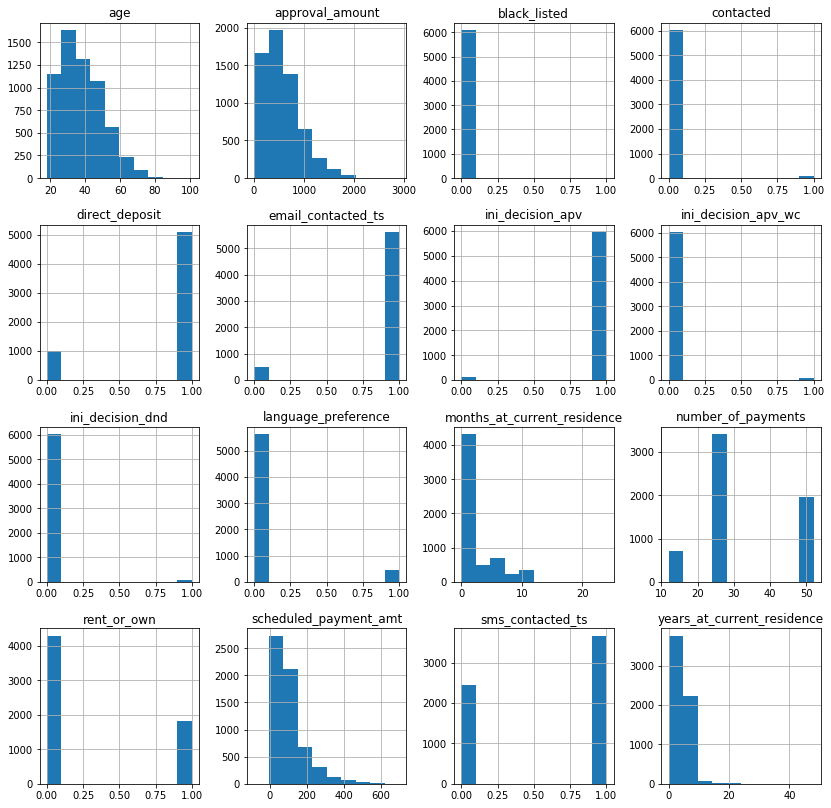

In [51]:
processed_data.hist(figsize=(14,14))
plt.show()